# Máquinas de Soporte Vectorial (SVM)

### Clasificación lineal

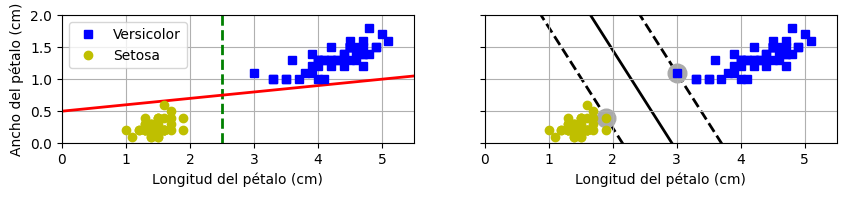

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn import datasets

# Cargar el conjunto de datos Iris como un DataFrame
iris = datasets.load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris.target

# Filtrar datos para solo incluir las clases Setosa (0) y Versicolor (1)
setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

# Crear y entrenar el modelo SVM con un kernel lineal
svm_clf = SVC(kernel="linear", C=10)
svm_clf.fit(X, y)

# Modelos lineales de ejemplo
x0 = np.linspace(0, 5.5, 200)
pred_1 = 0.1 * x0 + 0.5

# Definir una función para graficar la frontera de decisión del SVM
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    # Obtener los coeficientes y el intercepto de la frontera de decisión
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # Crear una serie de puntos a lo largo del eje x
    x0 = np.linspace(xmin, xmax, 200)
    # Calcular la frontera de decisión
    decision_boundary = -w[0] / w[1] * x0 - b / w[1]

    # Calcular los márgenes superior e inferior
    margin = 1 / w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    # Obtener los vectores de soporte
    svs = svm_clf.support_vectors_

    # Graficar la frontera de decisión y los márgenes
    plt.plot(x0, decision_boundary, "k-", linewidth=2, zorder=-2)
    plt.plot(x0, gutter_up, "k--", linewidth=2, zorder=-2)
    plt.plot(x0, gutter_down, "k--", linewidth=2, zorder=-2)
    # Destacar los vectores de soporte
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#AAA', zorder=-1)

fig, axes = plt.subplots(ncols=2, figsize=(10, 2.7), sharey=True)

plt.sca(axes[0])
plt.axvline(x=2.5, color='green', linestyle='--', linewidth=2)
plt.plot(x0, pred_1, "r-", linewidth=2)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Versicolor")  # Puntos azules para Versicolor
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Setosa")      # Puntos amarillos para Setosa
plt.xlabel("Longitud del pétalo (cm)")
plt.ylabel("Ancho del pétalo (cm)")
plt.axis([0, 5.5, 0, 2])
plt.gca().set_aspect("equal")
plt.legend()
plt.grid()

# Graficar la frontera de decisión del SVM

plt.sca(axes[1])
plot_svc_decision_boundary(svm_clf, 0, 5.5)

# Graficar los datos de entrenamiento
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Versicolor")  # Puntos azules para Versicolor
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Setosa")      # Puntos amarillos para Setosa

# Etiquetas y configuración de la gráfica
plt.xlabel("Longitud del pétalo (cm)")
plt.axis([0, 5.5, 0, 2])
plt.gca().set_aspect("equal")
plt.grid()

# Mostrar la gráfica
plt.show()


### Sensibilidad a la escala de las características

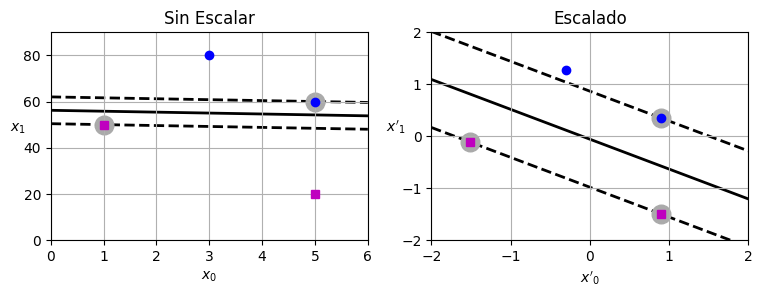

In [2]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC

# Datos de ejemplo
Xs = np.array([[1, 50], [5, 20], [3, 80], [5, 60]]).astype(np.float64)
ys = np.array([0, 0, 1, 1])

# Entrenar un SVM con los datos originales (sin escalar)
svm_clf = SVC(kernel="linear", C=100).fit(Xs, ys)

# Crear un escalador estándar
scaler = StandardScaler()
# Escalar los datos
X_scaled = scaler.fit_transform(Xs)
# Entrenar un SVM con los datos escalados
svm_clf_scaled = SVC(kernel="linear", C=100).fit(X_scaled, ys)

# Configurar la figura para la visualización
plt.figure(figsize=(9, 2.7))

# Gráfica de los datos sin escalar
plt.subplot(121)
plt.plot(Xs[:, 0][ys==1], Xs[:, 1][ys==1], "bo")  # Puntos azules para la clase 1
plt.plot(Xs[:, 0][ys==0], Xs[:, 1][ys==0], "ms")  # Puntos magenta para la clase 0
plot_svc_decision_boundary(svm_clf, 0, 6)  # Frontera de decisión del SVM
plt.xlabel("$x_0$")
plt.ylabel("$x_1$", rotation=0)
plt.title("Sin Escalar")
plt.axis([0, 6, 0, 90])
plt.grid()

# Gráfica de los datos escalados
plt.subplot(122)
plt.plot(X_scaled[:, 0][ys==1], X_scaled[:, 1][ys==1], "bo")  # Puntos azules para la clase 1
plt.plot(X_scaled[:, 0][ys==0], X_scaled[:, 1][ys==0], "ms")  # Puntos magenta para la clase 0
plot_svc_decision_boundary(svm_clf_scaled, -2, 2)  # Frontera de decisión del SVM escalado
plt.xlabel("$x'_0$")
plt.ylabel("$x'_1$", rotation=0)
plt.title("Escalado")
plt.axis([-2, 2, -2, 2])
plt.grid()

plt.show()


### Clasificación del margen duro (Hard Margin Classification)

In [3]:
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    # Obtener los coeficientes y el intercepto de la frontera de decisión
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # Crear una serie de puntos a lo largo del eje x
    x0 = np.linspace(xmin, xmax, 200)
    # Calcular la frontera de decisión
    decision_boundary = -w[0] / w[1] * x0 - b / w[1]

    # Calcular los márgenes superior e inferior
    margin = 1 / w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    # Obtener los vectores de soporte
    svs = svm_clf.support_vectors_

    # Graficar la frontera de decisión y los márgenes
    plt.plot(x0, decision_boundary, "k-", linewidth=2, zorder=-2)
    plt.plot(x0, gutter_up, "k--", linewidth=2, zorder=-2)
    plt.plot(x0, gutter_down, "k--", linewidth=2, zorder=-2)
    # Destacar los vectores de soporte
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#AAA', zorder=-1)

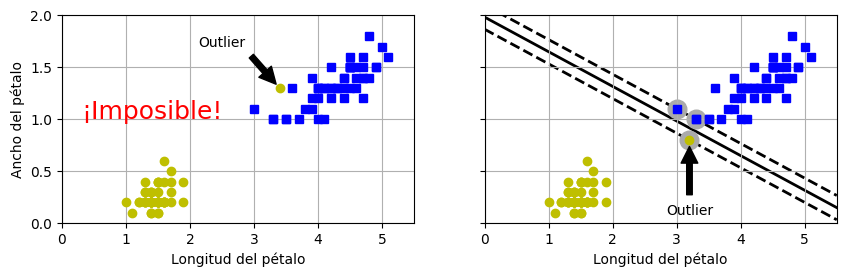

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn import datasets

# Cargar el conjunto de datos Iris como un DataFrame
iris = datasets.load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris.target

# Filtrar datos para solo incluir las clases Setosa (0) y Versicolor (1)
setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

# Crear y entrenar el modelo SVM con un kernel lineal
svm_clf = SVC(kernel="linear")
svm_clf.fit(X, y)

# Crear datos de outliers (valores atípicos)
X_outliers = np.array([[3.4, 1.3], [3.2, 0.8]])
y_outliers = np.array([0, 0])

# Crear nuevos conjuntos de datos incluyendo un outlier en cada uno
Xo1 = np.concatenate([X, X_outliers[:1]], axis=0)
yo1 = np.concatenate([y, y_outliers[:1]], axis=0)
Xo2 = np.concatenate([X, X_outliers[1:]], axis=0)
yo2 = np.concatenate([y, y_outliers[1:]], axis=0)

# Entrenar un nuevo modelo SVM con el segundo conjunto de datos con outliers
svm_clf2 = SVC(kernel="linear", C=10**9)
svm_clf2.fit(Xo2, yo2)

# Crear una figura con dos subgráficas
fig, axes = plt.subplots(ncols=2, figsize=(10, 2.7), sharey=True)

# Primera subgráfica: datos con el primer outlier
plt.sca(axes[0])
plt.plot(Xo1[:, 0][yo1==1], Xo1[:, 1][yo1==1], "bs", label="Versicolor")  # Puntos azules para Versicolor
plt.plot(Xo1[:, 0][yo1==0], Xo1[:, 1][yo1==0], "yo", label="Setosa")      # Puntos amarillos para Setosa
plt.text(0.3, 1.0, "¡Imposible!", color="red", fontsize=18)              # Texto indicando que es imposible
plt.xlabel("Longitud del pétalo")
plt.ylabel("Ancho del pétalo")
plt.annotate(
    "Outlier",
    xy=(X_outliers[0][0], X_outliers[0][1]),
    xytext=(2.5, 1.7),
    ha="center",
    arrowprops=dict(facecolor='black', shrink=0.1),
)
plt.axis([0, 5.5, 0, 2])
plt.grid()

# Segunda subgráfica: datos con el segundo outlier y la frontera de decisión del SVM
plt.sca(axes[1])
plt.plot(Xo2[:, 0][yo2==1], Xo2[:, 1][yo2==1], "bs", label="Versicolor")  # Puntos azules para Versicolor
plt.plot(Xo2[:, 0][yo2==0], Xo2[:, 1][yo2==0], "yo", label="Setosa")      # Puntos amarillos para Setosa
plot_svc_decision_boundary(svm_clf2, 0, 5.5)                             # Graficar la frontera de decisión del SVM
plt.xlabel("Longitud del pétalo")
plt.annotate(
    "Outlier",
    xy=(X_outliers[1][0], X_outliers[1][1]),
    xytext=(3.2, 0.08),
    ha="center",
    arrowprops=dict(facecolor='black', shrink=0.1),
)
plt.axis([0, 5.5, 0, 2])
plt.grid()

# Mostrar la gráfica
plt.show()


### Clasificación del margen blando (Soft Margin Classification)

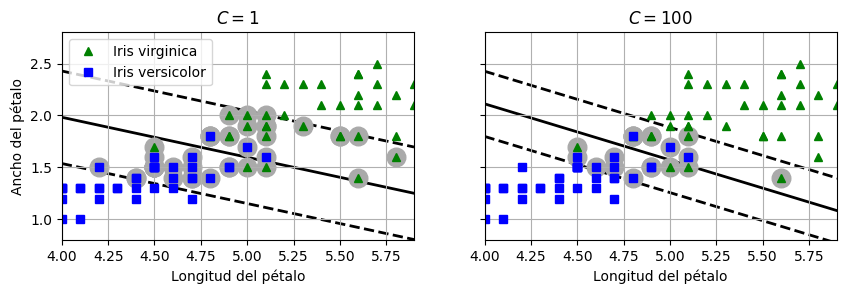

In [5]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
import numpy as np

iris = load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = (iris.target == 2)  # Iris virginica

scaler = StandardScaler()
svm_clf1 = LinearSVC(C=1, max_iter=10000, random_state=42)
svm_clf2 = LinearSVC(C=100, max_iter=10000, random_state=42)

scaled_svm_clf1 = make_pipeline(scaler, svm_clf1)
scaled_svm_clf2 = make_pipeline(scaler, svm_clf2)

scaled_svm_clf1.fit(X, y)
scaled_svm_clf2.fit(X, y)

# Convert to unscaled parameters
b1 = svm_clf1.decision_function([-scaler.mean_ / scaler.scale_])
b2 = svm_clf2.decision_function([-scaler.mean_ / scaler.scale_])
w1 = svm_clf1.coef_[0] / scaler.scale_
w2 = svm_clf2.coef_[0] / scaler.scale_
svm_clf1.intercept_ = np.array([b1])
svm_clf2.intercept_ = np.array([b2])
svm_clf1.coef_ = np.array([w1])
svm_clf2.coef_ = np.array([w2])

# Find support vectors (LinearSVC does not do this automatically)
t = y * 2 - 1
support_vectors_idx1 = (t * (X.dot(w1) + b1) < 1).ravel()
support_vectors_idx2 = (t * (X.dot(w2) + b2) < 1).ravel()
svm_clf1.support_vectors_ = X[support_vectors_idx1]
svm_clf2.support_vectors_ = X[support_vectors_idx2]

fig, axes = plt.subplots(ncols=2, figsize=(10, 2.7), sharey=True)

plt.sca(axes[0])
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^", label="Iris virginica")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs", label="Iris versicolor")
plot_svc_decision_boundary(svm_clf1, 4, 5.9)
plt.xlabel("Longitud del pétalo")
plt.ylabel("Ancho del pétalo")
plt.legend(loc="upper left")
plt.title(f"$C = {svm_clf1.C}$")
plt.axis([4, 5.9, 0.8, 2.8])
plt.grid()

plt.sca(axes[1])
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
plot_svc_decision_boundary(svm_clf2, 4, 5.99)
plt.xlabel("Longitud del pétalo")
plt.title(f"$C = {svm_clf2.C}$")
plt.axis([4, 5.9, 0.8, 2.8])
plt.grid()

plt.show()

## Clasificación No lineal

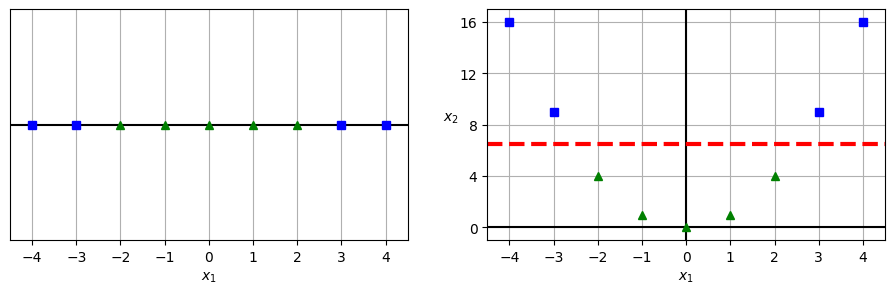

In [6]:
# Crear un conjunto de datos unidimensional con 9 puntos espaciados uniformemente entre -4 y 4
X1D = np.linspace(-4, 4, 9).reshape(-1, 1)

# Crear un conjunto de datos bidimensional agregando una segunda dimensión cuadrática a X1D
X2D = np.c_[X1D, X1D**2]

# Definir las etiquetas de clase para los puntos de datos
y = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

# Crear una figura con dos subgráficos
plt.figure(figsize=(10, 3))

# Subgráfico izquierdo
plt.subplot(121)
plt.grid(True) # Habilitar la cuadrícula
plt.axhline(y=0, color='k') # Línea horizontal en y=0 (eje x)
plt.plot(X1D[:, 0][y==0], np.zeros(4), "bs") # Puntos azules para la clase 0
plt.plot(X1D[:, 0][y==1], np.zeros(5), "g^") # Triángulos verdes para la clase 1
plt.gca().get_yaxis().set_ticks([]) # Ocultar las marcas del eje y
plt.xlabel("$x_1$") # Etiqueta del eje x
plt.axis([-4.5, 4.5, -0.2, 0.2]) # Establecer límites de los ejes

# Subgráfico derecho
plt.subplot(122)
plt.grid(True) # Habilitar la cuadrícula
plt.axhline(y=0, color='k') # Línea horizontal en y=0 (eje x)
plt.axvline(x=0, color='k') # Línea vertical en x=0 (eje y)
plt.plot(X2D[:, 0][y==0], X2D[:, 1][y==0], "bs") # Puntos azules para la clase 0
plt.plot(X2D[:, 0][y==1], X2D[:, 1][y==1], "g^") # Triángulos verdes para la clase 1
plt.xlabel("$x_1$") # Etiqueta del eje x
plt.ylabel("$x_2$  ", rotation=0) # Etiqueta del eje y con rotación de 0 grados
plt.gca().get_yaxis().set_ticks([0, 4, 8, 12, 16]) # Establecer marcas del eje y
plt.plot([-4.5, 4.5], [6.5, 6.5], "r--", linewidth=3) # Línea roja punteada
plt.axis([-4.5, 4.5, -1, 17]) # Establecer límites de los ejes

# Ajustar la disposición de los subgráficos
plt.subplots_adjust(right=1)

# Mostrar la figura
plt.show()

### Probando en el dataset make moons SIN agregar variables polinomiales

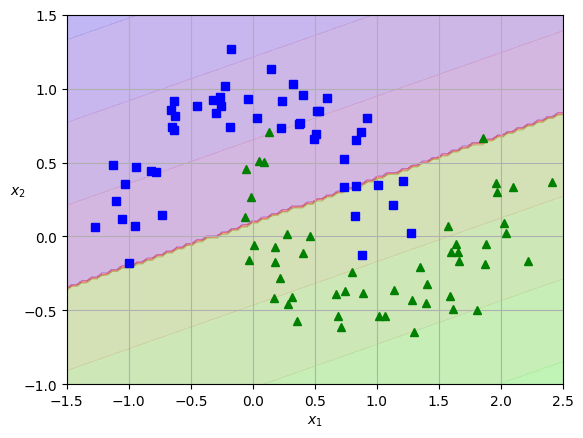

In [7]:
from sklearn.datasets import make_moons
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

lineal_svm_clf = make_pipeline(
    StandardScaler(),
    LinearSVC(C=10, max_iter=10000, random_state=42)
)
lineal_svm_clf.fit(X, y)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$", rotation=0)

def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(lineal_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

plt.show()

### Agregando variables polinomiales

In [8]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

polynomial_svm_clf = make_pipeline(
    PolynomialFeatures(degree=3),
    StandardScaler(),
    LinearSVC(C=10, max_iter=10000, random_state=42)
)
polynomial_svm_clf.fit(X, y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('standardscaler', StandardScaler()),
                ('linearsvc',
                 LinearSVC(C=10, max_iter=10000, random_state=42))])

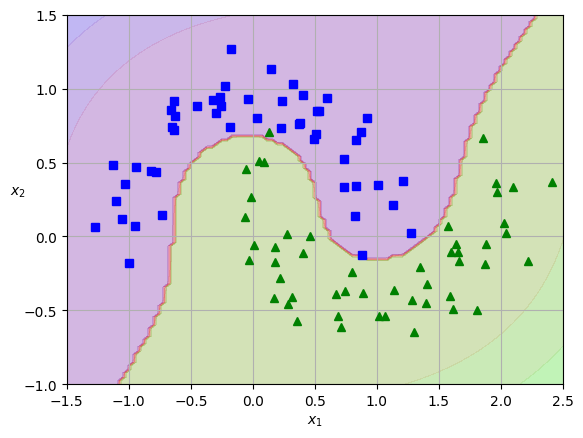

In [9]:
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$", rotation=0)

def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

plt.show()

## Kernel Polinomial

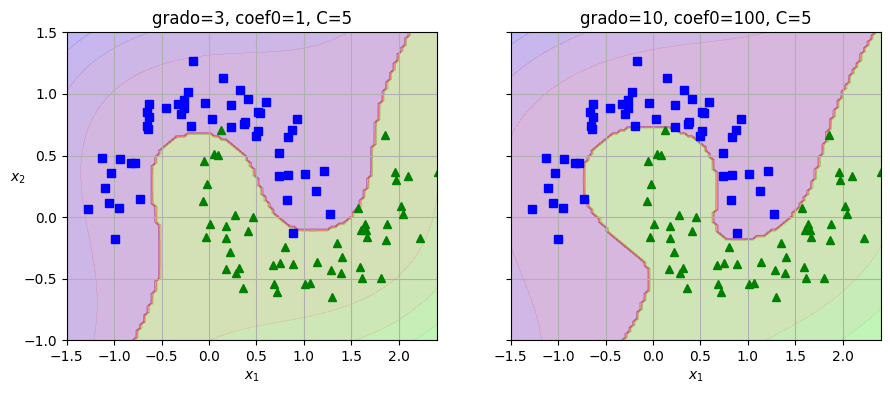

In [10]:
from sklearn.svm import SVC

poly_kernel_svm_clf = make_pipeline(StandardScaler(),
                                    SVC(kernel="poly", degree=3, coef0=1, C=5))
poly_kernel_svm_clf.fit(X, y)

poly100_kernel_svm_clf = make_pipeline(
    StandardScaler(),
    SVC(kernel="poly", degree=10, coef0=100, C=5)
)
poly100_kernel_svm_clf.fit(X, y)

fig, axes = plt.subplots(ncols=2, figsize=(10.5, 4), sharey=True)

plt.sca(axes[0])
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title("grado=3, coef0=1, C=5")

plt.sca(axes[1])
plot_predictions(poly100_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title("grado=10, coef0=100, C=5")
plt.ylabel("")

plt.show()

### Características de Similitud

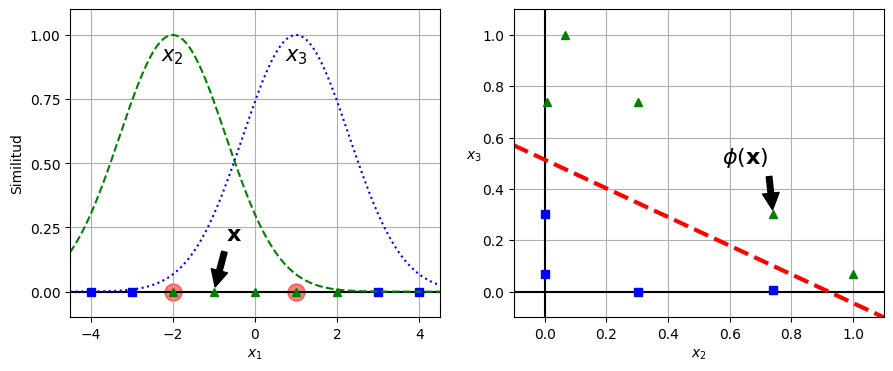

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Definir una función que calcule el kernel RBF gaussiano
def gaussian_rbf(x, landmark, gamma):
    return np.exp(-gamma * np.linalg.norm(x - landmark, axis=1)**2)

gamma = 0.3

# Crear una serie de puntos en el rango de -4.5 a 4.5
x1s = np.linspace(-4.5, 4.5, 200).reshape(-1, 1)

# Calcular la similitud de los puntos con dos landmarks usando el kernel RBF
x2s = gaussian_rbf(x1s, -2, gamma)
x3s = gaussian_rbf(x1s, 1, gamma)

# Definir los puntos de datos originales y sus etiquetas
X1D = np.linspace(-4, 4, 9).reshape(-1, 1)

# Calcular las características transformadas usando el kernel RBF
XK = np.c_[gaussian_rbf(X1D, -2, gamma), gaussian_rbf(X1D, 1, gamma)]
yk = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(10.5, 4))

# Subgráfico 1: Datos originales y sus similitudes con los landmarks
plt.subplot(121)
plt.grid(True)
plt.axhline(y=0, color='k')  # Línea horizontal en y=0
plt.scatter(x=[-2, 1], y=[0, 0], s=150, alpha=0.5, c="red")  # Landmarks
plt.plot(X1D[:, 0][yk==0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][yk==1], np.zeros(5), "g^")
plt.plot(x1s, x2s, "g--")  # Similitud con el landmark -2
plt.plot(x1s, x3s, "b:")   # Similitud con el landmark 1
plt.gca().get_yaxis().set_ticks([0, 0.25, 0.5, 0.75, 1])
plt.xlabel("$x_1$")
plt.ylabel("Similitud")
plt.annotate(
    r'$\mathbf{x}$',
    xy=(X1D[3, 0], 0),
    xytext=(-0.5, 0.20),
    ha="center",
    arrowprops=dict(facecolor='black', shrink=0.1),
    fontsize=16,
)
plt.text(-2, 0.9, "$x_2$", ha="center", fontsize=15)
plt.text(1, 0.9, "$x_3$", ha="center", fontsize=15)
plt.axis([-4.5, 4.5, -0.1, 1.1])

# Subgráfico 2: Datos transformados en el espacio de características
plt.subplot(122)
plt.grid(True)
plt.axhline(y=0, color='k')  # Línea horizontal en y=0
plt.axvline(x=0, color='k')  # Línea vertical en x=0
plt.plot(XK[:, 0][yk==0], XK[:, 1][yk==0], "bs")
plt.plot(XK[:, 0][yk==1], XK[:, 1][yk==1], "g^")
plt.xlabel("$x_2$")
plt.ylabel("$x_3$  ", rotation=0)
plt.annotate(
    r'$\phi\left(\mathbf{x}\right)$',  # Anotación para el punto transformado
    xy=(XK[3, 0], XK[3, 1]),  # Coordenadas del punto anotado
    xytext=(0.65, 0.50),  # Posición del texto de la anotación
    ha="center",
    arrowprops=dict(facecolor='black', shrink=0.1),  # Propiedades de la flecha
    fontsize=16,
)
# Graficar la línea de decisión
plt.plot([-0.1, 1.1], [0.57, -0.1], "r--", linewidth=3)  # Línea de decisión
plt.axis([-0.1, 1.1, -0.1, 1.1])  # Ajustar los ejes
plt.show()

### Kernel gaussiano RBF

In [12]:
from sklearn.svm import SVC

rbf_kernel_svm_clf = make_pipeline(StandardScaler(),
                                   SVC(kernel="rbf", gamma=5, C=0.001))
rbf_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=0.001, gamma=5))])

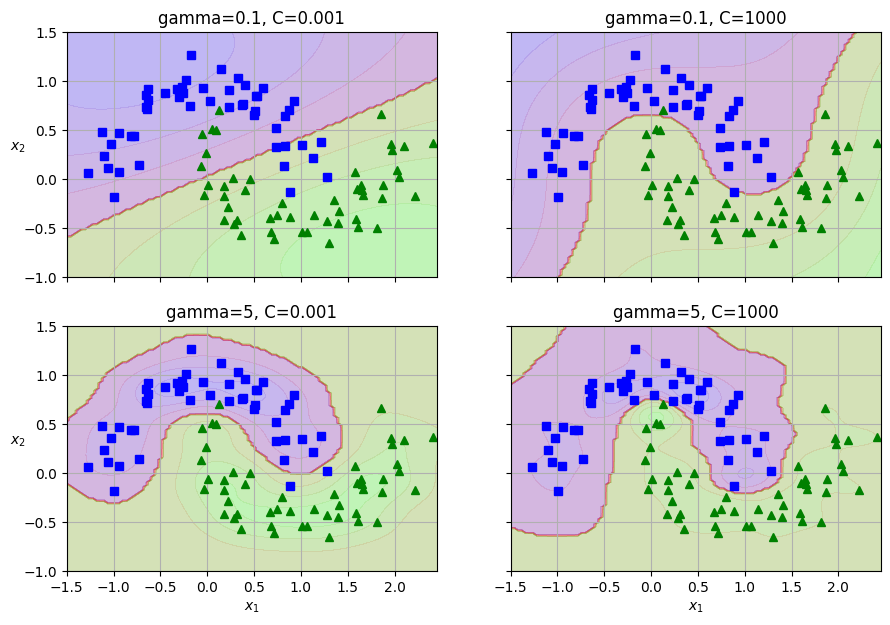

In [13]:
gamma1, gamma2 = 0.1, 5
C1, C2 = 0.001, 1000
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

svm_clfs = []
for gamma, C in hyperparams:
    rbf_kernel_svm_clf = make_pipeline(
        StandardScaler(),
        SVC(kernel="rbf", gamma=gamma, C=C)
    )
    rbf_kernel_svm_clf.fit(X, y)
    svm_clfs.append(rbf_kernel_svm_clf)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10.5, 7), sharex=True, sharey=True)

for i, svm_clf in enumerate(svm_clfs):
    plt.sca(axes[i // 2, i % 2])
    plot_predictions(svm_clf, [-1.5, 2.45, -1, 1.5])
    plot_dataset(X, y, [-1.5, 2.45, -1, 1.5])
    gamma, C = hyperparams[i]
    plt.title(f"gamma={gamma}, C={C}")
    if i in (0, 1):
        plt.xlabel("")
    if i in (1, 3):
        plt.ylabel("")
plt.show()

## SVM para regresión

In [14]:
from sklearn.svm import LinearSVR

# extra code – these 3 lines generate a simple linear dataset
np.random.seed(42)
X = 2 * np.random.rand(50, 1)
y = 4 + 3 * X[:, 0] + np.random.randn(50)

svm_reg = make_pipeline(StandardScaler(),
                        LinearSVR(epsilon=0.5, random_state=42))
svm_reg.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvr', LinearSVR(epsilon=0.5, random_state=42))])

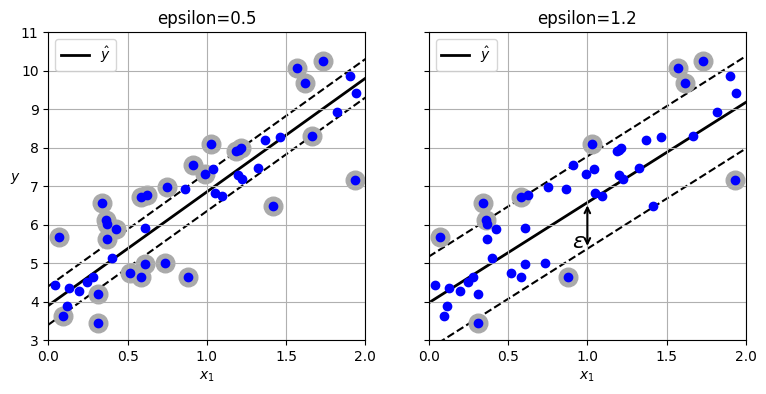

In [15]:
def encontrar_vectores_soporte(svm_reg, X, y):
    # Predecir los valores de y
    y_pred = svm_reg.predict(X)
    # Obtener el valor de epsilon
    epsilon = svm_reg[-1].epsilon
    # Encontrar los puntos fuera del margen
    fuera_del_margen = np.abs(y - y_pred) >= epsilon
    # Devolver los índices de los puntos fuera del margen
    return np.argwhere(fuera_del_margen)

def graficar_regresion_svm(svm_reg, X, y, ejes):
    # Crear una serie de puntos x1
    x1s = np.linspace(ejes[0], ejes[1], 100).reshape(100, 1)
    # Predecir los valores de y para los puntos x1
    y_pred = svm_reg.predict(x1s)
    # Obtener el valor de epsilon
    epsilon = svm_reg[-1].epsilon
    # Graficar la predicción y los márgenes
    plt.plot(x1s, y_pred, "k-", linewidth=2, label=r"$\hat{y}$", zorder=-2)
    plt.plot(x1s, y_pred + epsilon, "k--", zorder=-2)
    plt.plot(x1s, y_pred - epsilon, "k--", zorder=-2)
    # Destacar los vectores de soporte
    plt.scatter(X[svm_reg._support], y[svm_reg._support], s=180,
                facecolors='#AAA', zorder=-1)
    # Graficar los puntos de datos
    plt.plot(X, y, "bo")
    plt.xlabel("$x_1$")
    plt.legend(loc="upper left")
    plt.axis(ejes)

# Crear un modelo de regresión SVM
svm_reg2 = make_pipeline(StandardScaler(),
                         LinearSVR(epsilon=1.2, random_state=42))
# Entrenar el modelo SVM
svm_reg2.fit(X, y)

# Encontrar los vectores de soporte para ambos modelos
svm_reg._support = encontrar_vectores_soporte(svm_reg, X, y)
svm_reg2._support = encontrar_vectores_soporte(svm_reg2, X, y)

# Definir un punto epsilon para la segunda gráfica
eps_x1 = 1
eps_y_pred = svm_reg2.predict([[eps_x1]])

# Crear la figura y los ejes
fig, axes = plt.subplots(ncols=2, figsize=(9, 4), sharey=True)
plt.sca(axes[0])
# Graficar la regresión SVM
graficar_regresion_svm(svm_reg, X, y, [0, 2, 3, 11])
plt.title(f"epsilon={svm_reg[-1].epsilon}")
plt.ylabel("$y$", rotation=0)
plt.grid()

plt.sca(axes[1])
# Graficar la regresión SVM
graficar_regresion_svm(svm_reg2, X, y, [0, 2, 3, 11])
plt.title(f"epsilon={svm_reg2[-1].epsilon}")
# Añadir una flecha que representa el valor de epsilon
plt.annotate(
        '', xy=(eps_x1, eps_y_pred), xycoords='data',
        xytext=(eps_x1, eps_y_pred - svm_reg2[-1].epsilon),
        textcoords='data', arrowprops={'arrowstyle': '<->', 'linewidth': 1.5}
    )
plt.text(0.90, 5.4, r"$\epsilon$", fontsize=16)
plt.grid()
plt.show()

### Regresión no lineal

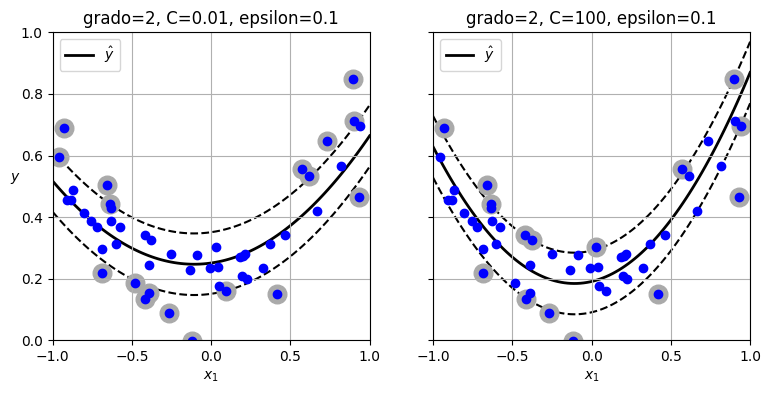

In [17]:
from sklearn.svm import SVR

np.random.seed(42)
X = 2 * np.random.rand(50, 1) - 1
y = 0.2 + 0.1 * X[:, 0] + 0.5 * X[:, 0] ** 2 + np.random.randn(50) / 10

svm_poly_reg = make_pipeline(StandardScaler(),
                             SVR(kernel="poly", degree=2, C=0.01, epsilon=0.1))
svm_poly_reg.fit(X, y)

svm_poly_reg2 = make_pipeline(StandardScaler(),
                             SVR(kernel="poly", degree=2, C=100))
svm_poly_reg2.fit(X, y)

svm_poly_reg._support = encontrar_vectores_soporte(svm_poly_reg, X, y)
svm_poly_reg2._support = encontrar_vectores_soporte(svm_poly_reg2, X, y)

fig, axes = plt.subplots(ncols=2, figsize=(9, 4), sharey=True)
plt.sca(axes[0])
graficar_regresion_svm(svm_poly_reg, X, y, [-1, 1, 0, 1])
plt.title(f"grado={svm_poly_reg[-1].degree}, "
          f"C={svm_poly_reg[-1].C}, "
          f"epsilon={svm_poly_reg[-1].epsilon}")
plt.ylabel("$y$", rotation=0)
plt.grid()

plt.sca(axes[1])
graficar_regresion_svm(svm_poly_reg2, X, y, [-1, 1, 0, 1])
plt.title(f"grado={svm_poly_reg2[-1].degree}, "
          f"C={svm_poly_reg2[-1].C}, "
          f"epsilon={svm_poly_reg2[-1].epsilon}")
plt.grid()
plt.show()

## Funcionamiento de SVM para clasificación lineal

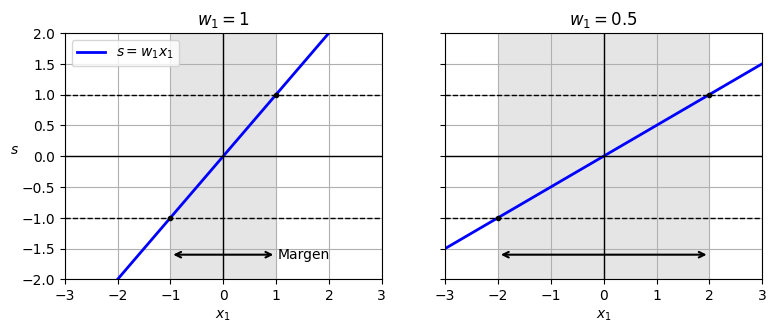

In [19]:
import matplotlib.patches as patches

def plot_2D_decision_function(w, b, ylabel=True, x1_lim=[-3, 3]):
    x1 = np.linspace(x1_lim[0], x1_lim[1], 200)
    y = w * x1 + b
    half_margin = 1 / w

    plt.plot(x1, y, "b-", linewidth=2, label=r"$s = w_1 x_1$")
    plt.axhline(y=0, color='k', linewidth=1)
    plt.axvline(x=0, color='k', linewidth=1)
    rect = patches.Rectangle((-half_margin, -2), 2 * half_margin, 4,
                             edgecolor='none', facecolor='gray', alpha=0.2)
    plt.gca().add_patch(rect)
    plt.plot([-3, 3], [1, 1], "k--", linewidth=1)
    plt.plot([-3, 3], [-1, -1], "k--", linewidth=1)
    plt.plot(half_margin, 1, "k.")
    plt.plot(-half_margin, -1, "k.")
    plt.axis(x1_lim + [-2, 2])
    plt.xlabel("$x_1$")
    if ylabel:
        plt.ylabel("$s$", rotation=0, labelpad=5)
        plt.legend()
        plt.text(1.02, -1.6, "Margen", ha="left", va="center", color="k")

    plt.annotate(
        '', xy=(-half_margin, -1.6), xytext=(half_margin, -1.6),
        arrowprops={'ec': 'k', 'arrowstyle': '<->', 'linewidth': 1.5}
    )
    plt.title(f"$w_1 = {w}$")

fig, axes = plt.subplots(ncols=2, figsize=(9, 3.2), sharey=True)
plt.sca(axes[0])
plot_2D_decision_function(1, 0)
plt.grid()
plt.sca(axes[1])
plot_2D_decision_function(0.5, 0, ylabel=False)
plt.grid()
plt.show()